In [32]:
import numpy
import scipy
import matplotlib.pyplot

# Spectral Analysis

## Simulate AR process
$$x_t=\alpha x_{t-1}+\epsilon_t$$

$$
x_t=\sum_{i=1}^k(\alpha_ix_{t-i})+\epsilon_t
$$

In [10]:
N = 200
alpha = numpy.array([-.9,.9])
k = len(alpha)
x = numpy.zeros(N)
for i in range(k,N):
    x[i] = sum(alpha*x[i-k:i])+numpy.random.randn()/15
    
x +=numpy.sin(numpy.linspace(0,10*numpy.pi,N))

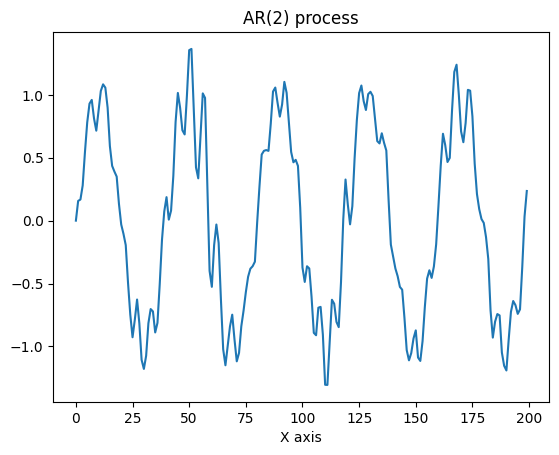

In [11]:
matplotlib.pyplot.plot(x)
matplotlib.pyplot.xlabel("X axis")
matplotlib.pyplot.title("AR(%s) process"%k)
matplotlib.pyplot.show()

## Fourier Transform

Creata a complex sine wave with length of signal, and frequnecy of looping index.
$$
s = e^{-i2\pi ft}
$$
Compute dot product between complex sine wave and signal.
$$
c_f=\sum_{k=1}^{n}s_kx_k
$$

In [8]:
#initialize Fourier coefficinets
fc = numpy.zeros(N,dtype=complex)
# 
t = numpy.arange(N)/N

for i in range(N):
    # Create complex sine way
    csw = numpy.exp(-1j*2*numpy.pi*i*t)
    # dot product with the signal
    fc[i] = numpy.dot(csw,x)
    
fc2 = numpy.fft.fft(x)

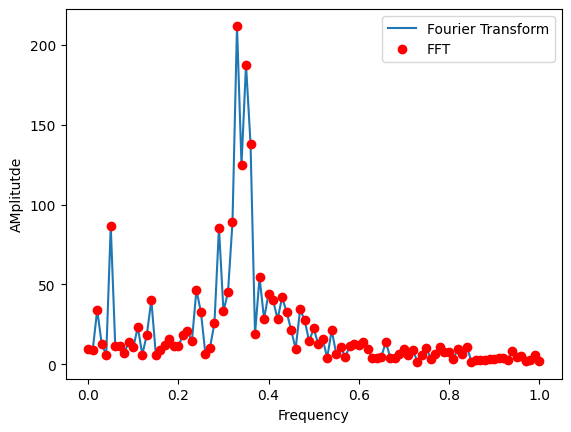

In [9]:
hz = numpy.linspace(0,1,int(N/2+1))

matplotlib.pyplot.plot(hz,numpy.abs(fc[:len(hz)]),label= "Fourier Transform")
matplotlib.pyplot.plot(hz,numpy.abs(fc2[:len(hz)]),'ro',label='FFT')
matplotlib.pyplot.xlabel('Frequency')
matplotlib.pyplot.ylabel('AMplitutde')
matplotlib.pyplot.legend()

# Zero Padding the FFT
it's about padding the time series signal with zeros to smooth out the signal representation in the frequency doamin.

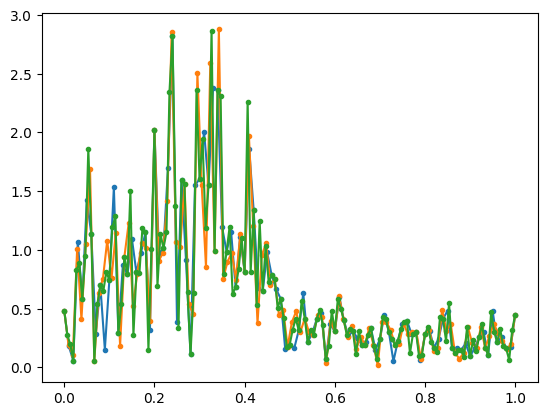

In [31]:
N = 200
alpha = numpy.array([-.6,.9])
k = len(alpha)
x = numpy.zeros(N)
for i in range(k,N):
    x[i] = sum(alpha*x[i-k:i])+numpy.random.randn()/25
    
# matplotlib.pyplot.plot(x)


for i in range(3):
    # specify the number of FFT points
    nfft = N + 10**i * int(i!=0)
    
    # compute the fft point
    xX = numpy.fft.fft(x,n=nfft)
    # hz vector
    hz = numpy.linspace(0,1,int(nfft/2+1))
    
    # plot the amplitude spectrum
    matplotlib.pyplot.plot(hz,numpy.abs(xX[:len(hz)]),'.-')

# Welch's method
it's about taking a portion of the whole time series data and perform fourier transform on this portion incrementaly and averaging all the portions to get the average spectrum.

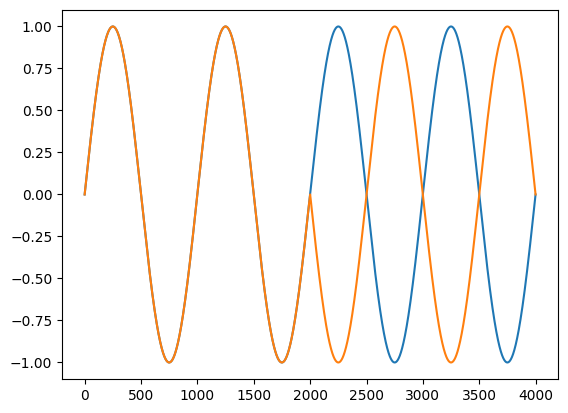

In [40]:
N = 2000
t = numpy.linspace(0,4*numpy.pi,N)

signal1 = numpy.concatenate((numpy.sin(t), numpy.sin(t)))
signal2 = numpy.concatenate((numpy.sin(t), -numpy.sin(t)))

matplotlib.pyplot.plot(signal1)
matplotlib.pyplot.plot(signal2)

matplotlib.pyplot.show()

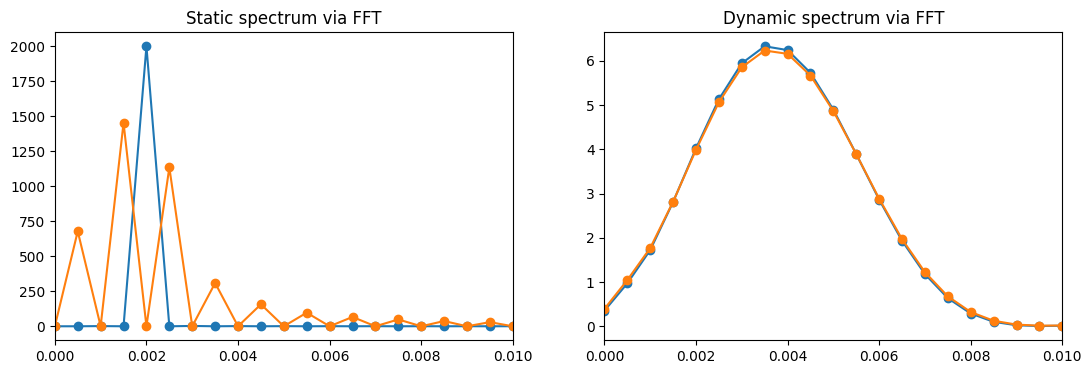

In [52]:
# 'static' forier transform

staticX1 = numpy.fft.fft(signal1)
staticX2 = numpy.fft.fft(signal2)
staticHz = numpy.linspace(0,1,int(len(signal1)/2+1))

# welch's method
dynamicHz, dynamicX1 = scipy.signal.welch(signal1,nfft=N )
dynamicHz, dynamicX2 = scipy.signal.welch(signal2,nfft=N )

fig,ax = matplotlib.pyplot.subplots(1,2,figsize=(13,4))

ax[0].plot(staticHz,numpy.abs(staticX1[:len(staticHz)]),'-o',label='Signal 1')
ax[0].plot(staticHz,numpy.abs(staticX2[:len(staticHz)]),'-o',label='Signal 2')
ax[0].set_xlim([0,.01])
ax[0].set_title('Static spectrum via FFT')

ax[1].plot(dynamicHz,numpy.abs(dynamicX1[:len(dynamicHz)]),'-o',label='signal 1')
ax[1].plot(dynamicHz,numpy.abs(dynamicX2[:len(dynamicHz)]),'-o',label='signal 2')
ax[1].set_xlim(0,0.01)
ax[1].set_title('Dynamic spectrum via FFT')


matplotlib.pyplot.show()

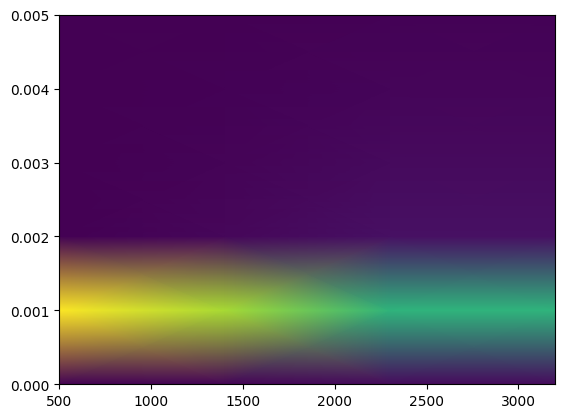

In [61]:
# spectrogram

f, t, Sxx = scipy.signal.spectrogram(signal1, noverlap=100, nperseg=1000)

matplotlib.pyplot.pcolormesh(t,f,Sxx,shading='gouraud')
matplotlib.pyplot.ylim([0,.005])
matplotlib.pyplot.show()

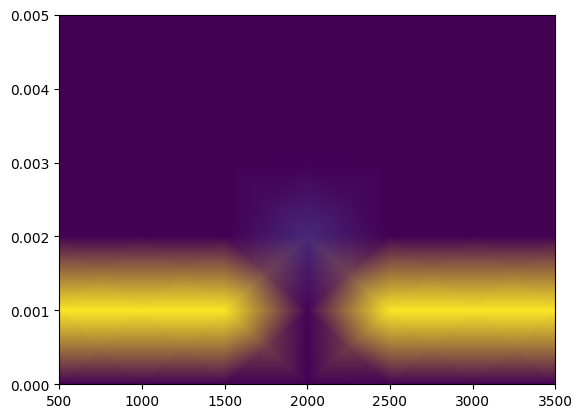

In [65]:
# spectrogram

f, t, Sxx = scipy.signal.spectrogram(signal2, noverlap=500, nperseg=1000)

matplotlib.pyplot.pcolormesh(t,f,Sxx,shading='gouraud')
matplotlib.pyplot.ylim([0,.005])
matplotlib.pyplot.show()